In [1]:
#서울특별시 공공자전거 신규가입자 파일 합치기
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
d1 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_19.12.csv', encoding='cp949')
d2 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_20.01_20.05.csv', encoding='cp949')
d3 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_20.06.csv', encoding='cp949')
d4 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_20.07_20.12.csv', encoding='cp949')
d5 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_21.01.csv', encoding='cp949')
d6 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/공공자전거 이용정보(월별)_21.02-21.06.csv', encoding='cp949')
d7 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_2017_1_12.csv', encoding='cp949')
d8 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_2018_1_6.csv', encoding='cp949')
d9 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_201807_201812.csv', encoding='cp949')
d10 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_201901_201906.csv', encoding='cp949')
d11 = pd.read_csv('서울시 공공자전거 이용정보_2017_2021/서울특별시 공공자전거 이용정보(월별)_201907_201911.csv', encoding='cp949')

In [2]:
pd.set_option('mode.chained_assignment',None)

In [3]:
d1.columns
# dfs = [d1,d2,d3,d4,d5,d6,d7,d8]
#2020: df2,3,4
#2017: df7
#2019: df10,11,1

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간'],
      dtype='object')

In [4]:
d1.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Dec-19,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,Dec-19,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,Dec-19,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,Dec-19,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,Dec-19,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [5]:
#2020끼리 데이터 합치기############
#전처리 내용: column명 통일, 데이터 형식 통일
#d2의 column name, 대여일자 데이터 형식이 d3, d4와 다름.
for df in [d2,d3,d4]:
    print(df.columns)
d2.columns = d3.columns #column name 동일하게 만들기
d2.head()

#대여일자 데이터 형식 동일하게 만들기
m_keys = d2['대여일자'].unique()
m_values = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06']
dic = dict(zip(m_keys,m_values))
dic
d2['대여일자'] = d2['대여일자'].apply(lambda x: dic[x])
d2
d2.info()



Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327231 entries, 0 to 327230
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     327231 non-null  object 
 1   대여소번호    327231 non-null  int64  
 2   대여소명     327231 non-null  object 
 3   대여구분코드   327231 non-null  object 
 4   성별       272841 non-null  object 
 5   연령대코드    327231 non-null  object 
 6   이용건수     327231 non-null  int64  
 7   운동량      327231 non-null  object 
 8   탄소량      327231 non-null  object 
 9   이동거리(M)  327231 non-null  float64
 10  이용시간(분)  327231 non-null  int

In [6]:
df_2020 = pd.concat([d2,d3,d4])#2020년 자전거 이용 데이터
df_2020

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2020-01,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,2020-01,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,2020-01,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,2020-01,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,2020-01,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64
...,...,...,...,...,...,...,...,...,...,...,...
532170,2020-12,9999,시스템관리팀,정기,F,AGE_006,1,\N,\N,0.0,0
532171,2020-12,9999,시스템관리팀,정기,M,AGE_003,2,0.00,0.00,0.0,76
532172,2020-12,9999,시스템관리팀,정기,M,AGE_004,1,\N,\N,0.0,15
532173,2020-12,99999,99999. 영남단말기정비,정기,\N,AGE_008,7,0.00,0.00,0.0,18


In [7]:
df_2020 = df_2020[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이용시간(분)']]#분석할 column만 추출
df_2020[df_2020['이동거리(M)'].isnull()]#null값은 지울까 아니면 0으로 채울까-->0으로 채우기!
df_2020.fillna(0)
df_2020

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분)
0,2020-01,3,AGE_003,3,2230.0,75
1,2020-01,3,AGE_004,1,1220.0,15
2,2020-01,3,AGE_005,3,17270.0,53
3,2020-01,5,AGE_005,2,90.0,33
4,2020-01,5,AGE_003,1,196010.0,64
...,...,...,...,...,...,...
532170,2020-12,9999,AGE_006,1,0.0,0
532171,2020-12,9999,AGE_003,2,0.0,76
532172,2020-12,9999,AGE_004,1,0.0,15
532173,2020-12,99999,AGE_008,7,0.0,18


In [8]:
df_2020.isnull().sum()

대여일자       0
대여소번호      0
연령대코드      0
이용건수       0
이동거리(M)    0
이용시간(분)    0
dtype: int64

In [9]:
#연령대코드 바꾸기
keys = df_2020.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))
dic
df_2020['연령대코드'] = df_2020.연령대코드.apply(lambda x: dic[x])
df_2020

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분)
0,2020-01,3,10s,3,2230.0,75
1,2020-01,3,20s,1,1220.0,15
2,2020-01,3,30s,3,17270.0,53
3,2020-01,5,30s,2,90.0,33
4,2020-01,5,10s,1,196010.0,64
...,...,...,...,...,...,...
532170,2020-12,9999,60s,1,0.0,0
532171,2020-12,9999,10s,2,0.0,76
532172,2020-12,9999,20s,1,0.0,15
532173,2020-12,99999,40s,7,0.0,18


In [10]:
# datetime.strptime(df_2020['대여일자'], "%")
#월 column, 분기 column 추가
df_2020['월'] = pd.to_datetime(df_2020['대여일자'],format='%Y-%m').dt.month
df_2020['분기'] = pd.to_datetime(df_2020['대여일자'],format='%Y-%m').dt.quarter
df_2020

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분),월,분기
0,2020-01,3,10s,3,2230.0,75,1,1
1,2020-01,3,20s,1,1220.0,15,1,1
2,2020-01,3,30s,3,17270.0,53,1,1
3,2020-01,5,30s,2,90.0,33,1,1
4,2020-01,5,10s,1,196010.0,64,1,1
...,...,...,...,...,...,...,...,...
532170,2020-12,9999,60s,1,0.0,0,12,4
532171,2020-12,9999,10s,2,0.0,76,12,4
532172,2020-12,9999,20s,1,0.0,15,12,4
532173,2020-12,99999,40s,7,0.0,18,12,4


In [11]:
bike_2020 = df_2020.groupby(['월'])['이용건수'].sum()
df_2020.groupby(['월'])['이용건수'].sum()
bike_Q20 = df_2020.groupby(['분기'])['이용건수'].sum()

Text(0.5, 1.0, '2020 seoul public bike consumption')

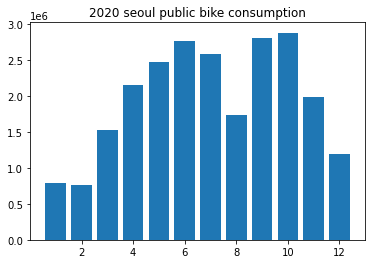

In [12]:
plt.bar(df_2020.월.unique(), bike_2020)#좀더 보는사람이 재밌게<-------
plt.title('2020 seoul public bike consumption')#2020년 공공자전거 이용 횟수

In [13]:
# plt.bar(range(1,5),bike_Q20 ) #위랑 똑같은데 분기별-이거 2019랑 같이 비교해서 보여주기

In [14]:
#★★★★★★★★★★★2019 전처리 스타트★★★★★★★★★★★★★★★★

In [15]:
#합치기 전 데이터 통일
for df in [d1,d10,d11]:
    print(df.columns)
    
d1.columns = d10.columns #column name 동일하게 만들기
d1.head()

# #대여일자 데이터 형식 동일하게 만들기
d1['대여일자'] = '2019-12'
d1.head()

Index(['대여일자', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')
Index(['대여일자', '대여소번호', '대여소', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이동시간(분)'],
      dtype='object')


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019-12,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,2019-12,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,2019-12,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,2019-12,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,2019-12,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [16]:
df_2019 = pd.concat([d1,d10,d11])
df_2019 = df_2019[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이동시간(분)']]
df_2019
df_2019[df_2019['이동거리(M)'].isnull()]#null값 없음
df_2019.isnull().sum()

대여일자       0
대여소번호      0
연령대코드      0
이용건수       0
이동거리(M)    0
이동시간(분)    0
dtype: int64

In [17]:
keys = df_2019.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))
dic
df_2019['연령대코드'] = df_2019.연령대코드.apply(lambda x: dic[x])
df_2019

,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이동시간(분)
0,2019-12,3,10s,7,43610,118
1,2019-12,3,20s,2,0,10
2,2019-12,3,30s,5,4410,99
3,2019-12,5,30s,1,0,8
4,2019-12,5,20s,5,16880,205
...,...,...,...,...,...,...
336816,2019-11,9998,20s,8,7910,86
336817,2019-11,99998,30s,2,0,0
336818,2019-11,99999,50s,6,48460,71
336819,2019-11,99999,20s,10,50680,161


In [18]:
#월별, 분기별 컬럼 추가
df_2019['월'] = pd.to_datetime(df_2019['대여일자'],format='%Y-%m').dt.month
df_2019['분기'] = pd.to_datetime(df_2019['대여일자'],format='%Y-%m').dt.quarter
bike_2019 = df_2019.groupby(['월'])['이용건수'].sum() #bike_2019: 2019년 월별 이용횟수
df_2019.groupby(['월'])['이용건수'].sum()

bike_Q19 = df_2019.groupby(['분기'])['이용건수'].sum() #bike_Q19: 2019년 분기별 이용횟수

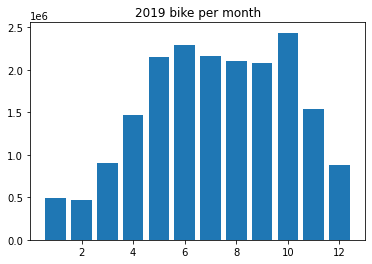

In [19]:
plt.bar(range(1,13), bike_2019)
plt.title('2019 bike per month')
plt.show()

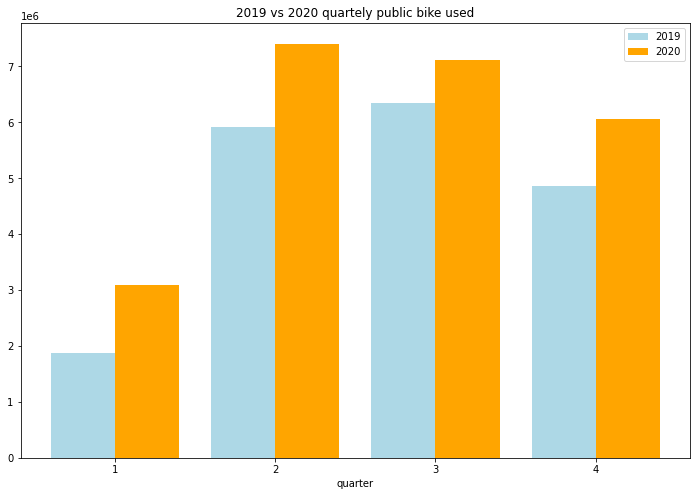

In [20]:
#2019 vs 2020 분기별 공공자전거 이용 횟수◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁
plt.figure(figsize=(12,8))
plt.title('2019 vs 2020 quartely public bike used')
plt.bar(np.arange(0.8,4.8),  bike_Q19, width = 0.4, label = '2019', color='lightblue')
plt.bar(np.arange(1.2,5.2),bike_Q20, width = 0.4, label = '2020', color = 'orange' )
plt.xlabel('quarter')
plt.xticks(np.arange(1,5))
plt.legend()
plt.show()

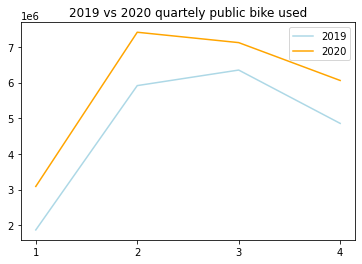

In [21]:
plt.title('2019 vs 2020 quartely public bike used')
plt.plot(bike_Q19, label = '2019', color='lightblue')
plt.plot(bike_Q20, label = '2020', color = 'orange' )
plt.legend()
plt.xticks(np.arange(1,5))
plt.show()

In [22]:
#지역별로 플롯이 나눠져있음, 플롯 안 x축: 연도, y축: 평당분양가격★★★★★★★★★★★★★★★★★★★★★고민해보기

# sns.relplot(data=df_last, x="연도", y="평당분양가격", 
#             hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

# sns.relplot(data=df_2019, x="월", y="bikeQ_19", 
#             hue="분기", kind="line", col="분기", col_wrap=4, ci=None)

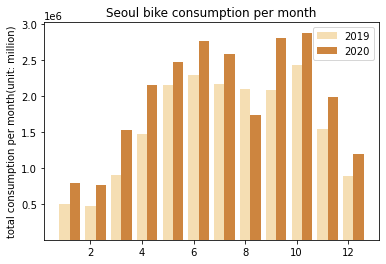

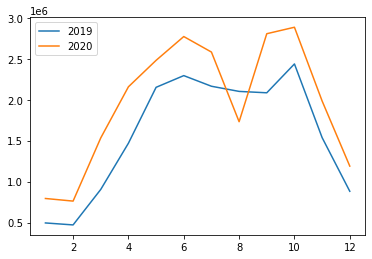

In [23]:
#2019 vs 2020월별막대- 위에 있는 분기별 막대로 대체
months = range(1,13)
# plt.figure(figsize=(10,8))
plt.bar(months, bike_2019, width = 0.4, bottom = 10, label='2019', color='wheat')
plt.bar([i+0.4 for i in months], bike_2020, label='2020',width = 0.4, color = 'peru')
plt.legend()
plt.ylabel('total consumption per month(unit: million)')
plt.title('Seoul bike consumption per month')
plt.show()
# plt.figure(figsize=(10,8))
plt.plot(bike_2019, label='2019')
plt.plot(bike_2020, label='2020')
plt.legend()
plt.show()

In [24]:
#★★★★★★★★★★★★★★★★★2019 vs 2021 6월까지★★★★★★★★★★★★★★★★★★★★★★

In [25]:
half_19 = df_2019[df_2019['월']<7] #2019 1-6월
half_21 = pd.concat([d5,d6])
half_21.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-01,3,중랑센터,일일(회원),M,AGE_003,2,47.68,0.40,1720.00,25
1,2021-01,3,중랑센터,정기,M,AGE_003,11,578.98,2.87,12390.48,166
2,2021-01,3,중랑센터,정기,M,AGE_004,1,81.65,0.53,2291.05,13
3,2021-01,5,상암센터 정비실,일일(회원),\N,AGE_004,1,511.95,3.53,15209.58,47
4,2021-01,5,상암센터 정비실,일일(회원),M,AGE_004,6,371.10,3.39,14642.60,134


In [26]:
half_21 = half_21[['대여일자','대여소번호','연령대코드','이용건수','이동거리(M)','이용시간(분)']]
half_21[half_21['이동거리(M)'].isnull()]#null값 없음


,대여일자,대여소번호,연령대코드,이용건수,이동거리(M),이용시간(분)


In [27]:
keys = half_21.연령대코드.unique()
values = ['10s','20s','30s','40s','50s','60s','70s','etc']
dic = dict(zip(keys,values))
half_21['연령대코드'] = half_21.연령대코드.apply(lambda x: dic[x])
half_21['월'] = pd.to_datetime(half_21['대여일자'],format='%Y-%m').dt.month
bike_21 = half_21.groupby(['월'])['이용건수'].sum()

In [28]:
sample = bike_21-bike_2019[:6]

In [29]:
sample

월
1     297033
2     762146
3    1278013
4    1572530
5     797374
6    1164515
Name: 이용건수, dtype: int64

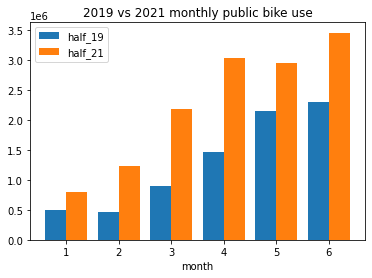

In [30]:
#목적: 지하철, 버스 2019 vs 2021 이용과 비교하기 위해 사용◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁◀◁
plt.bar(np.arange(0.8,6.8), bike_2019[:6], label = 'half_19', width = 0.4)
plt.bar(np.arange(1.2,7.2), bike_21, label = 'half_21', width = 0.4)
plt.legend()
plt.title('2019 vs 2021 monthly public bike use')
plt.xlabel('month')
plt.show()

In [31]:
#2020 사용자의 연령별 분포 확인하기
#이거 하고나서 교통사고 데이터의 나이 찾아보기
df_2020.head()
count_20 = df_2020.groupby(['연령대코드'])['이용건수'].sum()
driven_20 = df_2020.groupby(['연령대코드'])['이동거리(M)'].mean()

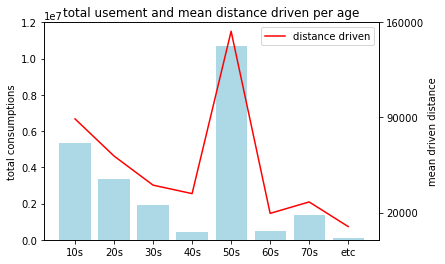

In [32]:
#연령대별 자전거 이용 횟수 & 횟수별 이동 평균 거리(km)
#왜 그래프 크기가 안커지지!!!!!!
#plt.figure(figsize=(12,8))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

bar = ax1.bar(df_2020['연령대코드'].unique(), count_20, label = 'count', color = 'lightblue')
plot = ax2.plot(driven_20, label = 'distance driven', color='red')
ax1.set_ylabel('total consumptions')
ax1.set_ylim(0,12000000)
ax2.set_ylabel('mean driven distance')
ax2.set_ylim(0, 160000)
ax2.set_yticks([20000,90000,160000])
plt.legend()
plt.title('total usement and mean distance driven per age')
plt.show()

In [33]:
#그래프 해석: 50대의 이용자 수도, 평균 거리 수도 많은 것을 확인할 수 있다.
#아...상관관계분석 하는게좋긴하겠지만,,,일단 pass
#자전거가 피해자인 교통사고 살펴보기

In [34]:
#2020 교통사고 데이터 보기~~~~~~
taas1 = pd.read_csv('교통사고1720_taas/서울시 자전거 교통사고_피해자_2020.csv', encoding='utf-8')
taas2 = pd.read_csv('교통사고1720_taas/서울시 자전거 교통사고_피해자_2017_2019.csv', encoding='utf-8')


In [35]:
taas = pd.concat([taas1, taas2])#2017-2020 dataset concate하기
taas['월'] = [dt.strptime(taas.사고일시.iloc[i], "%Y년 %m월 %d일 %H시").month for i in range(len(taas))]
taas.head()
taas['월'].unique()
taas['년'] = [dt.strptime(taas.사고일시.iloc[i], "%Y년 %m월 %d일 %H시").year for i in range(len(taas))]

In [36]:
taas = taas[['사고번호', '요일', '시군구', '노면상태', '기상상태', '가해운전자 성별', '가해운전자 연령', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '월', '년']]
taas.head()

,사고번호,요일,시군구,노면상태,기상상태,가해운전자 성별,가해운전자 연령,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,월,년
0,2020010100100101,수요일,서울특별시 강동구 성내동,포장 - 건조,흐림,남,43세,남,76세,경상,1,2020
1,2020010200100312,목요일,서울특별시 송파구 잠실동,포장 - 건조,맑음,여,47세,남,64세,중상,1,2020
2,2020010200100341,목요일,서울특별시 송파구 풍납동,포장 - 건조,맑음,남,22세,여,53세,경상,1,2020
3,2020010400100045,토요일,서울특별시 중랑구 상봉동,포장 - 건조,흐림,여,34세,남,52세,중상,1,2020
4,2020010400100306,토요일,서울특별시 광진구 자양동,포장 - 건조,맑음,남,64세,여,20세,상해없음,1,2020


In [42]:
taas['피해운전자 연령'] = taas['피해운전자 연령'].str.extract('(\d+)')#피해운전자 연령 숫자로 변환
taas.isnull().sum()
taas = taas.dropna()
taas.isnull().sum() #null값 제거

사고번호          0
요일            0
시군구           0
노면상태          0
기상상태          0
가해운전자 성별      0
가해운전자 연령      0
피해운전자 성별      0
피해운전자 연령      0
피해운전자 상해정도    0
월             0
년             0
dtype: int64

In [43]:
def ages(age):
    age = int(age)
    if age>=80: return 'etc'
    elif age>=70: return '70s'
    elif age>=60: return '60s'
    elif age>=50: return '50s'
    elif age>=40: return '40s'
    elif age>=30: return '30s'
    elif age>=20: return '20s'
    else: return '10s'


In [44]:
taas['피해운전자 연령'] = taas['피해운전자 연령'].apply(ages)

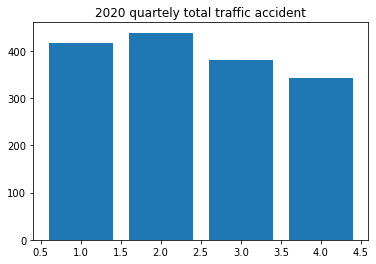

In [54]:
#월별 교통사고: 분기별로 바꿈★★★★★★★★
# taas.groupby(['월']).count()['사고번호']
month_20 = taas[taas['년']==2020].groupby(['월']).count()['사고번호']

accident_Q20 = [sum([month_20.iloc[i],month_20.iloc[i+4],month_20.iloc[i+8]]) for i in range(len(month_20)//3)]
accident_Q20
plt.bar(range(1,5), accident_Q20)
plt.title('2020 quartely total traffic accident')
plt.show()

<BarContainer object of 7 artists>

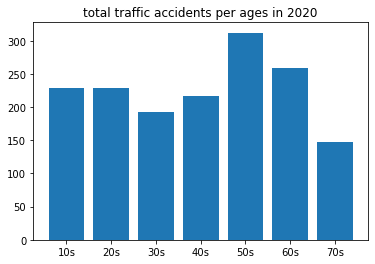

In [55]:
# 2020년 연령별 교통사고
age_20 = taas[taas['년']==2020].groupby(['피해운전자 연령'])['사고번호'].count()
ages = ['10s','20s','30s','40s','50s','60s','70s']
plt.title('total traffic accidents per ages in 2020')
plt.bar(ages, age_20)

In [59]:
# taas[taas['피해운전자 연령']=='50s'].groupby(['월'])['사고번호'].count().max()
taas20 = taas[taas['년']==2020]
age50s_20 = taas20[taas20['피해운전자 연령']=='50s'].groupby(['월'])['사고번호'].count()

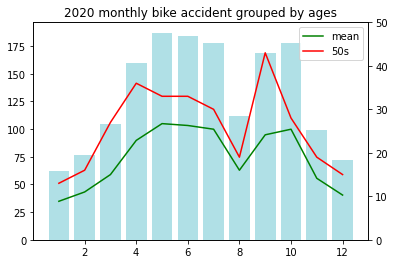

In [60]:
#★★★★★★★★★★★★★★★★★★★★★★★★★★★2020 월별 연령대 사고 횟수★★★★★★★★★★★★★★★★★★★★★★★★
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#총 사고 횟수
ax1.bar(range(1,13), month_20, label='total accident', color = 'powderblue')

#월별 연령대 평균 사고 vs 월별 50대 사고
# plt.bar(ages, taas.groupby(['피해운전자 연령'])['사고번호'].count())
age_mean = taas[taas['년']==2020].groupby(['월'])['사고번호'].count()/len(ages)

ax2.plot(range(1,13), age_mean, label='mean', color = 'g')
ax2.plot(range(1,13), age50s_20, label='50s', color='red')
ax2.set_ylim(0,50)
plt.title('2020 monthly bike accident grouped by ages')
plt.legend()
plt.show()
# print(age_mean, age_50s)

In [61]:
taas['년'].unique()

array([2020, 2017, 2018, 2019], dtype=int64)

In [65]:
taas19 = taas[taas['년']==2019]
taas18 = taas[taas['년']==2018]

month_18 = taas18.groupby(['월'])['사고번호'].count()
month_19 = taas19.groupby(['월'])['사고번호'].count()

accident_Q18 = [sum([month_18.iloc[i],month_18.iloc[i+4],month_18.iloc[i+8]]) for i in range(len(month_18)//3)]
accident_Q19 = [sum([month_19.iloc[i],month_19.iloc[i+4],month_19.iloc[i+8]]) for i in range(len(month_19)//3)]

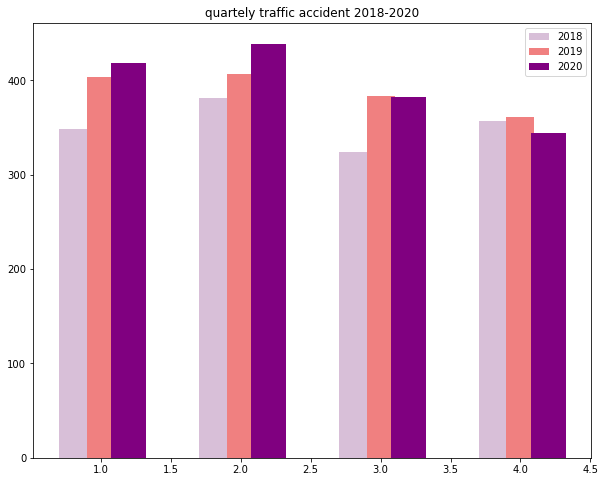

In [67]:
#★★★★★★★★★★★★★★★★★★★★★★★★2018-2020 분기별 연령대 사고 횟수★★★★★★★★★★★★★★★★★★★★★★★★

plt.figure(figsize=(10,8))
plt.bar(np.arange(0.8,4.8), accident_Q18, width=0.2, label='2018', color='thistle')
plt.bar(range(1,5), accident_Q19, width=0.2, label='2019', color='lightcoral')
plt.bar(np.arange(1.2,5.2), accident_Q20, width=0.25, label='2020', color='purple')
plt.legend()
plt.title('quartely traffic accident 2018-2020')
plt.show()

Text(0.5, 1.0, '2018 vs 2020 total severe injury from bike accident')

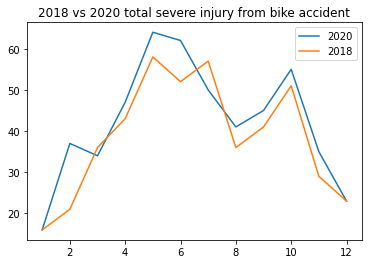

In [69]:
#★★★★★★★★★★★★★★★★★★★★★★2018 vs 2020 월별 중상+사망 교통사고 횟수★★★★★★★★★★★★★★★★★★★★★★★★
#위 bar plot과 그래프 합쳐도 되고?
#중상+사망 그래프만 가져옴
taas['피해운전자 상해정도'].unique()
heavy20 = taas20[taas20['피해운전자 상해정도']=='중상'].groupby('월')['사고번호'].count()
death20 = taas20[taas20['피해운전자 상해정도']=='사망'].groupby('월')['사고번호'].count()
injury = heavy20.add(death20, fill_value=0)

heavy18 = taas18[taas18['피해운전자 상해정도']=='중상'].groupby('월')['사고번호'].count()
death18 = taas18[taas18['피해운전자 상해정도']=='사망'].groupby('월')['사고번호'].count()
injury18 = heavy18.add(death18, fill_value=0)

plt.plot(injury, label='2020')
plt.plot(injury18, label='2018')
plt.legend()
plt.title('2018 vs 2020 total severe injury from bike accident')

In [ ]:
#이번에 할거: 2018 vs 2020 구별로 자전거전용도로 증가?
# 2018 vs 2020 구별 교통사고 현황
#구별로 자전거전용도로 증감 데이터와 교통사고 증감 데이터 상관관계 파악하기